We will now train a decision tree and a simple neural network, a multi-layer perceptron, to classify handwritten digits in the MNIST dataset

Below we load our libraries we'll be using and download the MNIST dataset

In [1]:
# Read in the mnist digit dataset

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
import random
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Next, we will divide the data into a training set and test set, randomly selecting 5000 examples for training.

In [2]:
train_samples = 5000

# X is in pandas format for some reason. Convert to numpy.
X = np.array(X)
y = np.array(y)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=1000)

Let's print out the 417$^{\text{th}}$ item in the dataset and its label.

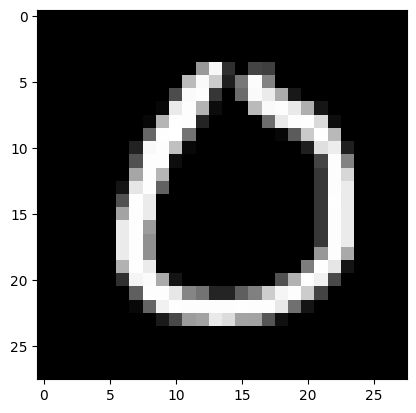

'0'

In [10]:
i = 410
img = np.array(X_train[i]).reshape(28,28)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
y_train[i]

Let's see how a decision tree with 170 decision rules performs by training it and printing its accuracy.

In [5]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 170)
clf = clf.fit(X_train, y_train)
correct = 0
for i in range(len(X_test)):
  if clf.predict([X_test[i]]) == y_test[i]: correct = correct + 1
  acc = [100.0* correct / len(X_test)]
acc

[77.1]

Now let's try a simple neural network, a multi-layer perceptron with no hidden layers.

In [7]:
clf = MLPClassifier(hidden_layer_sizes=[], max_iter = 10000, activation = 'identity')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.854


Now, we will add one hidden layer and expand the number of hidden units from 10 to 200 in intervals of 10. We'll print the accuracy of each model given the number of hidden units.

In [8]:
for i in range(1,21):
  nhidden = i*10
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(nhidden, score)

10 0.521
20 0.824
30 0.857
40 0.873
50 0.855
60 0.877
70 0.868
80 0.881
90 0.863
100 0.904
110 0.889
120 0.891
130 0.895
140 0.908
150 0.91
160 0.916
170 0.909
180 0.899
190 0.907
200 0.909


To see how a model varies across multiple runs, we check it ten times.

In [9]:
nhidden = 170
for i in range(10):
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(nhidden,score)

170 0.889
170 0.909
170 0.901
170 0.909
170 0.92
170 0.911
170 0.91
170 0.9
170 0.916
170 0.914


In [24]:
index = 700
result = clf.predict([X_test[index]])
result

array(['8'], dtype='<U1')

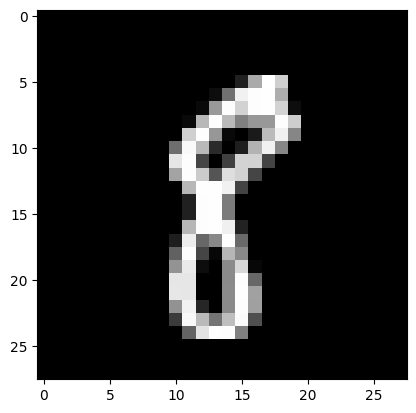

'8'

In [25]:
img = np.array(X_test[index]).reshape(28,28)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
y_test[index]